<a href="https://colab.research.google.com/github/shubhi0078/AirBnB-bookings-DF-Analysis/blob/main/Copy_of_AirBnB_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnB EDA Project 










##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual 
SHUBHAM SHARMA



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -** https://github.com/shubhi0078/AirBnB-bookings-DF-Analysis/blob/4261fb0e6c1d81c4e21f936c0a141612be8c059c/AirBnB_EDA_Project.ipynb


Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [6]:
%matplotlib inline 

### Dataset Loading

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/python datasets folder/Airbnb NYC 2019.csv')

### Dataset First View

In [9]:
# Dataset First Look
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

#The command above tells us that there are 16 columns and 48895 rows in the dataset. 

(48895, 16)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count 
df2 = df.groupby(df.columns.tolist(), as_index=False).size()
df2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,size
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38816,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,1
38817,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,1
38818,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,1
38819,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,1


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Figure size 720x432 with 0 Axes>

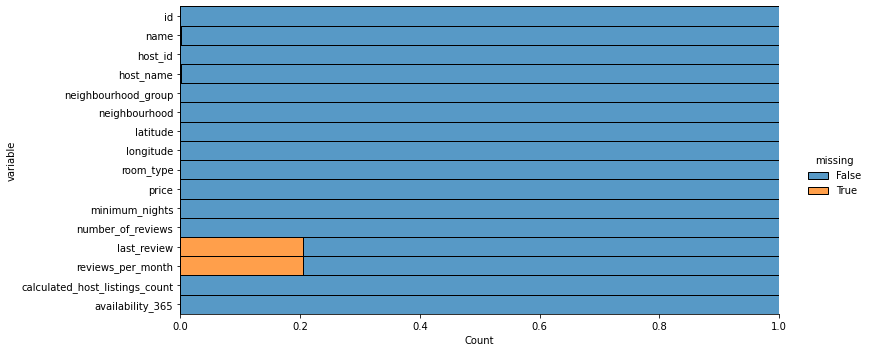

In [14]:

# Visualizing the missing values
#plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


plt.figure(figsize = (10,6))
sns.displot( 
     data=df.isna().melt(value_name="missing"),
            y = "variable",
            hue = "missing",
            multiple = "fill",
            aspect = 2.25
)



# What did you know about your dataset?

###The visualization of the missing values clearly shows that there are four columns which contains the missing values.These are "name", "host_name","last_review","reviews per month" that contains the null values while the rest of the columns does not contain any null values. 


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

The Description of all the variables is a given below ⁉1.   **ID** - Shows the unique ID of the listing
2.  **Name** -   It shows the name of the listings 
3.   **host_id** - The ID of the hosts
4.   **host_name** - Name of the hosts available
5.   **neighbourhood_group** - Location of the neighbourhood
6.   **neighbourhood** - It shows the area of the neighbourhood 
7.   **latitude** - The range of latitude
8.   **longitude** - The range of longitude
9.   **room_type** - It shows different type of listings available 
10.   **price** - It shows the price of listing price available
11.   **minimum_nights** - It shows the price of minimum night to be paid for listing available
12.   **number_of_reviews** - Number of reviews 
13.   **last_review** - It represents the content of the last review 
14.   **reviews_per_month** - It shows checks on a basis of monthly duration
15.   **calculated_host_listings_count** - It shows the total number of listing count 
16.   **availability_365** - It shows the availablitiy for period of time i.e, 1 year


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
unique_count = df.nunique().to_dict()

Text(0.5, 1.0, 'Unique values count of columns in AirBnB Dataset')

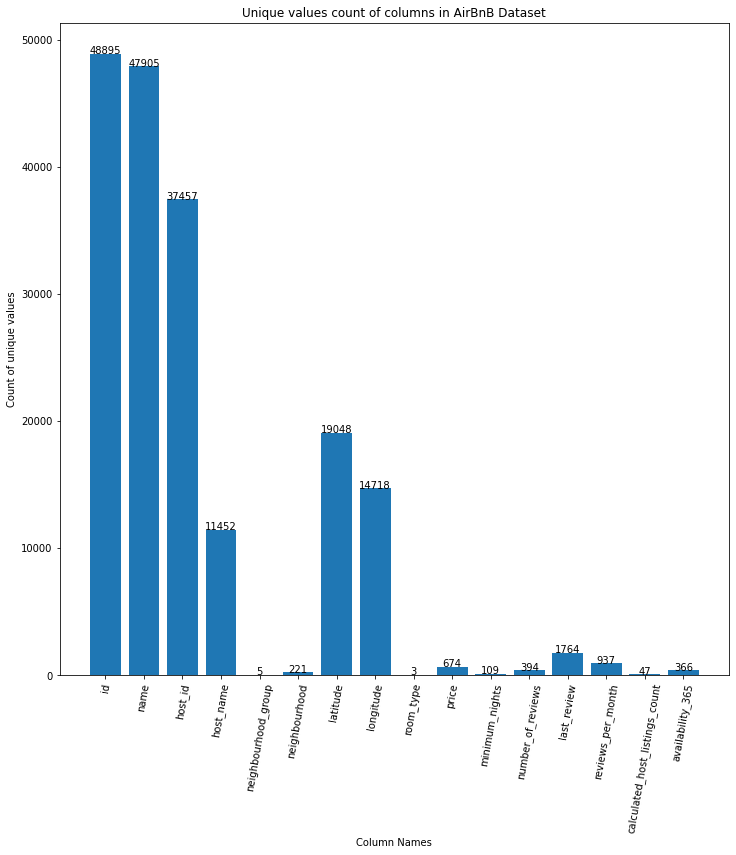

In [18]:
plt.figure(figsize=(12,12))
plt.bar(unique_count.keys(),unique_count.values())
plt.xlabel('Column Names')
plt.ylabel('Count of unique values')
plt.xticks(rotation=80)
for i, v in enumerate(unique_count.values()):
    plt.text(i, v+1, str(v), ha='center')
plt.title('Unique values count of columns in AirBnB Dataset')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.head()

### What all manipulations have you done and insights you found?

In [ ]:
#1 Finding top hosts name with the highest reviews per month 
top_10_hosts = df.groupby(['host_id','host_name'])['reviews_per_month'].mean().sort_values(ascending = False).head(10)
top_10_hosts

In [ ]:
#2 Top listings with the highest reviews_per_month
top_10_listings = df.groupby(['name'])['reviews_per_month'].mean().sort_values(ascending = False).head(10)
top_10_listings



In [ ]:
#3 Total Room count from the entire dataset 
room_count = df.groupby(['room_type'])['room_type'].count()
room_count


In [ ]:
#4 Total number of rooms in each neighbourhood group
neighbourhood_rooms = df.groupby(['neighbourhood_group'])['neighbourhood_group'].count()
neighbourhood_rooms



In [ ]:
#5 Room wise distribution in each neighbourhood group 
room_wise_dist = df.groupby(['neighbourhood_group','room_type']).agg({'room_type':'count','availability_365':'mean','price':'mean'})
room_wise_dist




In [ ]:
room_reviews = df.groupby(['room_type'])['reviews_per_month'].mean()
room_reviews = room_reviews.reset_index() 
room_reviews



In [ ]:
#7 Top 10 hosts who are managing highgest number of listings 
top_host_listings = df.groupby(['host_name'])['name'].count().sort_values(ascending = False).head(10) 
top_host_listings




In [ ]:
#8 Neighbourhood group with average price, reivews_per_month, average rooms with room wise 
df.groupby(['name','room_type','neighbourhood_group']).agg({'reviews_per_month':'mean','availability_365':'mean'}).sort_values(by = 'reviews_per_month',ascending = False).head(10)

In [ ]:
#9 top 10 neighbourhoods with highest prices & reviews per month 

top_neighbourhood = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False).head(10)
top_neighbourhood




In [ ]:
#10 Total income host wise 

total_income = df.groupby(['host_id','host_name'])['price'].sum().sort_values(ascending = False).head(10)
total_income

In [ ]:
#Neigbhourhood Groups with higher prices 
neighbourG_prices = df.groupby(['neighbourhood_group'])['price'].mean()
neighbourG_prices 



In [ ]:
#1 contains the list of top 10 hosts name with the highest average of reviews per month - Louann is at the top with the average of 20.94 reviews. Additionaly, host id is also included in the list that can prevent any duplication in the aggregation
#2 contains the list of top 10 listings which are maintaining the highest average reviews per month - Enjoy great views of the City in our Deluxe Room!	 is at the top with 58.50 reviews per month 
#3 shows us the room type count composition shows us that Entire home/apt is at the top with 25409 while only 1160 shared rooms are available in the 5 neighbourhood groups. 
#4 shows us the distribution of rooms neighbourhood wise. Manhattan is topping the chart with 21661 rooms while staten islands have only 373 rooms available. 
#5 shows us an important distribution with the count of room type, average available days in the year and the average price 
#6 shows us an interesting insight with the average reviews of all three room types. Here the average of the shared room is 1.47 while the average of Entire home/apt is lowest with 1.30. It clearly states that shared room is the first choice of guests despite having less number of rooms(shown in #3)
#7 shows us the list of top 10 hosts which are maintaining higher listings. Sonder(NYC)is topping the chart with 327 listings. 
#8 shows us the another important distiribution of top 10 listings with room type, neighbourhood group, reviews per month and availability of total days in an year. The major observations are as given below : 
#i) Enjoy great views of the City in our Deluxe Room! is at the top of the chart with higest reviews per month while the average availability of the listing is 299 days. As the name suggest, it is be a premium property located in manhattan which offers a great city view with finest hospitality services. 
#ii) Out of Top 10, 9 rooms are private rooms which means that private rooms are highly preferred by the guests among all three room types. 
#iii) 8 rooms belong to the "Queens" neighbourhood group while 2 rooms belong to "Manhattan" Group.
#9 shows us the list of top 10 neighbourhoods with higher average prices - Fort Wadsworth is at the top spot with $800
#10 shows us the top 10 hosts who have earned highest income through listings. Since, the insights does not includes cost and other expenses, hence we may not consider it as the net profit, instead we may call it gross income of the hosts. The host Sonder(NYC) is at the top of the chart with $82795. The reason for his higher income is because Sonder(NYC) is also managing the highest number of listings in the city(as shown in #7)
#11 shows us an unavoidable insights where we can easily compare the average prices of all neighbourhood_groups. Manhattan is at the top with 196.87$ while bronx and queens are almost charging half of Manhattan with 87 and 99 respectively. Since Manhattan is the business centre of New York, this might be reason for higher charges in this neighbourhood group. 


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#visualization of 1

top_10_hosts_df = pd.DataFrame(top_10_hosts)
top_10_hosts_df = top_10_hosts_df.reset_index()

plt.figure(figsize = (20,8))
my_palette = sns.color_palette("Set1")
sns.barplot(x = 'host_name',y = 'reviews_per_month', data = top_10_hosts_df, palette = my_palette)
plt.xlabel('Host Names',fontsize=22)
plt.ylabel('Reviews per month',fontsize=22)
plt.xlabel('top 10 hosts with highest average number of reviews')

plt.xticks(fontsize = 18, rotation = 85)
plt.yticks(fontsize = 18, rotation = 85)

plt.show()

#The Chart shows the top 10 host names with the highest reviews per month  

##### 1. Why did you pick the specific chart?

The bar graph makes it easy for us to represent data through bars with varying lenghts 

##### 2. What is/are the insight(s) found from the chart?

The chart provides us the list of top 10 hosts. It can further helps guests to book and know the best hosts with higher reviews. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart has enabled us to easily identify the most successful Airbnb hosts, who have made a considerable contribution to the platform by having the highest average reviews per month. The visual representation of the data has made it simple and efficient to recognize the hosts who have had the greatest influence on the Airbnb community.

#### Chart - 2

In [ ]:
#Top 10 listings with highest reviews per month
top_10_listings = top_10_listings.reset_index()
plt.figure(figsize=(18,8))

sns.barplot(x="reviews_per_month", y="name", data=top_10_listings.reset_index())

# Add labels and title
plt.xlabel('Average Reviews', size =15)
plt.ylabel('Listing', size =15)
plt.title('Top  Listings who have highest average reviews', size =15)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


# Display the graph
plt.show()

##### 1. Why did you pick the specific chart?

The chart made it easy for us to quickly identify the top and lowest listing among the list of highest average reviews

##### 2. What is/are the insight(s) found from the chart?

The listing "Enjoy great views of the city  in our Deluxe Room" is leading all the listings in terms of average reviews per month. while the remaining 9 listings are giving a healthy competition to each other by a slight difference. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight can actually help us to identify the factors influencing the best and poor performance of the listings. Hence, these factors can be improved to gain top slots among all listings.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

#Piechart showing the composition room types count 
plt.figure(figsize = (8,12))
plt.pie(room_count, labels = room_count.index, autopct = '%1.1f%%', textprops={'fontsize': 20})
plt.title('Pie Chart of Room Types', fontsize=16)

plt.show()

##### 1. Why did you pick the specific chart?

Pie chart shows us the percentage share of the all the room types in the distribution.

##### 2. What is/are the insight(s) found from the chart?




Among all three room types, the "Entire home/apt" has occupied more than half of the share of the market. While on the other hand, the shared room has occupied a small share with 2.4% of the market. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps us to identify the market trends. It clearly shows us that the demand of top 2 room types is quite higher than the demand of "shared rooms".

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#  Subplots to visualize the relationship between neighbourhood_groups and room_type with at different aspects that are given below:
# i) count of all room types in each neihbourhood groups 
# ii) Average availability by room type 
# iii) Average prices by neighbourhood groups


fig, axs = plt.subplots(1, 3, figsize=(27, 12))

# Subplot 1: Room Type count by Neighbourhood Group
sns.countplot(x='neighbourhood_group', hue='room_type', data= df, ax=axs[0])
axs[0].set_title('Room Type count by Neighbourhood Group',fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=85, fontsize=18)

# Subplot 2: Average availability by Neighbourhood Group and Room Type
sns.barplot(x='neighbourhood_group', y='availability_365', hue='room_type', data= df, ax=axs[1])
axs[1].set_title('Average availability by Neighbourhood Group and Room Type',fontsize = 18)
axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=85, fontsize=18)

# Subplot 3: Average price by Neighbourhood Group and Room Type
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=df, ax=axs[2])
axs[2].set_title('Average price by Neighbourhood Group and Room Type',fontsize = 18)
axs[2].set_xticklabels(axs[0].get_xticklabels(), rotation=85, fontsize=18)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The sublots helped us to compare and analyze the relationship of room type neighbourhood groups with multiple factors* viz.* i) Room type count by neighbourhood group ii) Average Availability by rooom type and neighbourhood group iii) Average price by room types and neighbourhoood groups. 

##### 2. What is/are the insight(s) found from the chart?

There are multiple insights found from the chart. Lets take on all of them given below :
i) subplot 1 - Manhattan is currently hosting the maximum of listings. While Staten islands and Bronx are hosting the lowest number of listing among the neighbourhood groups 
ii) Staten islands has the highest average availability rate. While manhattan and Brooklyn are among the lowest in terms of average availability rate. It clearly shows that these two neighbourhood groups are quite busier in terms average listings received through AirBnB.
iii)  The average price in Manhattan is higher as compared to other neighbourhood groups while the trends are relatively similar to other neighbourhood groups. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight may help us to analyze the prices and averge availability of all neighbourhood groups. The business can take further decisions after considering the factors provided in the insights.  

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize = (12,18))
plt.pie(neighbourhood_rooms, labels = neighbourhood_rooms.index, autopct = '%1.2f%%',textprops={'fontsize': 20})
plt.title('Number of rooms available in each neighbourhood group',fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart shows us the percentage composition of number of rooms available in each neighbourhood group 

##### 2. What is/are the insight(s) found from the chart?

The chart states that manhattan and brooklyn have occupied the maximum percentage of number of rooms which is more than 85% among the neighbourhood groups. While the queens have the share of 11.59% and other remaining neighbourhood groups i.e. staten islands and bronx are jointly occupying only 3.5% of the share.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights shows us that the lowest 3 neighbourhood groups in terms of total number of available can gain a huge market share by offering the best and competitive experience to the guests. 

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Average reviews with the room types 

plt.figure(figsize=(12,8))
plt.bar(x=room_reviews['room_type'], height=room_reviews['reviews_per_month'])

# Set the title and axis labels
plt.title('Average Reviews per Month by Room Type',fontsize = 18)
plt.xlabel('Room Type',fontsize = 18)
plt.ylabel('Average Reviews per Month',fontsize = 18)
plt.xticks(fontsize = 18)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The bar graph helped us to easily read and understand the data.

##### 2. What is/are the insight(s) found from the chart?

This is one of the interseting insight which shows that the average reviews are higher in shared room as compared to entire home/apt and private room. While the room count of shared room is quite less as compared to other room types. It means despite having low room counts, the shared room is highly preferred by the guests. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight clearly shows the preference of customers. The hosts can try to increase the number of shared rooms because this is the first choice of guests. 

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize = (25,8))
plt.plot(top_host_listings.index, top_host_listings.values, marker='o')

# Set the title and axis labels
plt.title('Top Hosts', fontsize=25)
plt.xlabel('Host Name', fontsize=25)
plt.ylabel('Number of Listings', fontsize=25)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)

# Add labels to the markers
for i, label in enumerate(top_host_listings.index):
    plt.text(top_host_listings.index[i], top_host_listings.values[i], label,
             fontsize=18, ha='center', va='bottom')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The line graph helps us to compare the represented data in an easy manner. 

##### 2. What is/are the insight(s) found from the chart?

Michael is at the top who is managing highest number of listings while maria is at the lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight is very important for the hosts to contribute more in terms of listings to the community. 

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
top_neighbourhood.plot.bar(x='neighbourhood', y='price', figsize=(12, 8))

# Set the title and axis labels
plt.title('Top 10 Neighbourhoods by Price', fontsize=18)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps us to compare the average prices of top 10 neighbourhoods in terms of higher prices

##### 2. What is/are the insight(s) found from the chart?

The graph shows us the distribution of average prices among the top neighbourhoods 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the pricing insight may help the hosts and compete in the market in terms of pricing.  

#### Chart - 9

In [ ]:
# Chart - 9 visualization code



sns.set(rc={"figure.figsize": (25, 10)})

fig, (ax1, ax2) = plt.subplots(1, 2)

sns.scatterplot(data=df, x="latitude", y="price", hue="neighbourhood_group", palette='dark', ax=ax1)
ax1.set_title('Latitude vs. Price', size = 15)
ax1.set_xlabel('Latitude', fontsize = 14)
ax1.set_ylabel('Price', fontsize = 14)

sns.scatterplot(data=df, x="longitude", y="price", hue="neighbourhood_group", palette='dark', ax=ax2)
ax2.set_title('Longitude vs. Price', size = 15)
ax2.set_xlabel('Longitude', fontsize = 14)
ax2.set_ylabel('Price', fontsize = 14)

##### 1. Why did you pick the specific chart?

The scatter plot helps us to identify the neighbourhood group wise longitude and latitude distribution 

##### 2. What is/are the insight(s) found from the chart?

The insights shows us the locations of listings by all the neighbourhood groups. It shows that brooklyn and manhattan are having more locations than the rest of the three neighbourhood groups 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight may enable the competitors and AirBnB to identify the locations which are having less or no listings. It means that more listings can be added in such locations in order to beat the competition. 

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True)

##### 1. Why did you pick the specific chart?

The correlation heatmap is helping us to find the direct relationship between all the fields. 

##### 2. What is/are the insight(s) found from the chart?


The chart is showing us direct relationships between all the fields with each other. The price is highly correlated with latitude and longitude with higher degree, While the rest of the the variables are correlated with lesser degree. 

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, 
             hue='species',  # Color points by species
             diag_kind='kde',  # Use kernel density estimates on diagonal
             plot_kws={'alpha': 0.5},  # Set scatterplot point alpha to 0.5
             diag_kws={'shade': True}  # Shade density plots
            )

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is created to visually explore the pairwise relationships between different variables in a dataset. It helps identify patterns, correlations, and outliers in high-dimensional datasets. By inspecting the pairplot, we can gain insights into the structure and relationships within the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***